# グラフの書き方

ROOTではTGraph()を使ってグラフを作成、表示する。
書式  
```c++
    new TGraph(データ数,x配列,y配列);
```

詳しくは[ROOTのホームページ参照](https://root.cern.ch/doc/master/classTGraph.html)  

以下でsin関数のグラフを作成してみる。  
まず$0,30,45, 60, 90$度をx配列に、そのサイン関数の値を計算しておいてy配列につめる。

In [1]:
double x[10] = {0, 30, 45, 60, 90, 120, 135, 150, 180}; // x配列
double y[10] = {0, 0.5,0.70710678, 0.86602540, 1, 0.86602540, 0.70710678, 0.5, 0}; // y配列

キャンバスの作成

In [2]:
auto can = new TCanvas();

グラフの作成

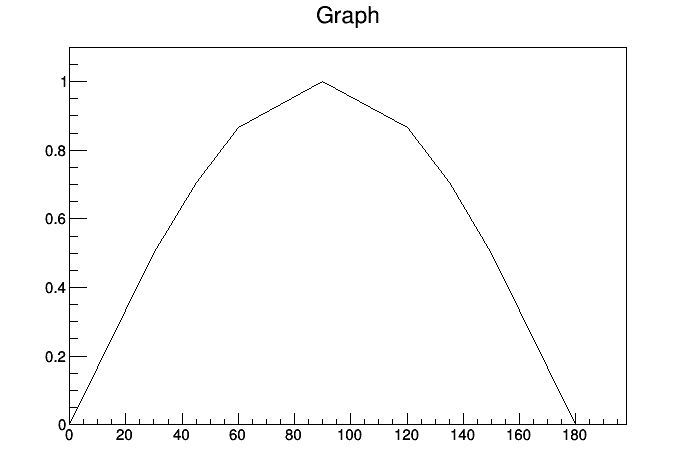

In [3]:
auto gr = new TGraph(9,x,y);
gr->Draw();
can->Draw();

実用上、計算をコードの外で行なって配列に詰めていくということは効率が悪いのでやらない。  
コード上でループを行いsin関数を呼んで計算していく。  
以下が普通に用いるコード

In [4]:
const int num = 100; // 配列の要素数
double q[num]; // 角度
double sq[num]; // sin関数の配列

for文を使って各要素にsin関数のデータとエラーを代入していく。  
ここでstatic_castはデータ型の変換を意味する。つまり整数型のiを浮動小数点型に変換している。  
TMath::Sin(),TMath::Pi()は名前空間TMathで定義されているSin(),Pi()という関数を意味している。  
名前空間については[補足]()  
なお、for文など複数の行を記述するようになるとROOTのコマンドラインで一行づつ入力するスタイルだと作業効率が悪くなるのでマクロファイルを作成してそれを実行する方が良い。

In [5]:
for(int i = 0; i < 100;++i)
{
    q[i] = (static_cast<double>(i)/100)*360.0; //0-360 degのデータ
    sq[i] = TMath::Sin(q[i]*TMath::Pi()/180); // deg. -> radの変換をするのを忘れないこと
}

In [6]:
auto gr1 = new TGraph(num,q,sq);


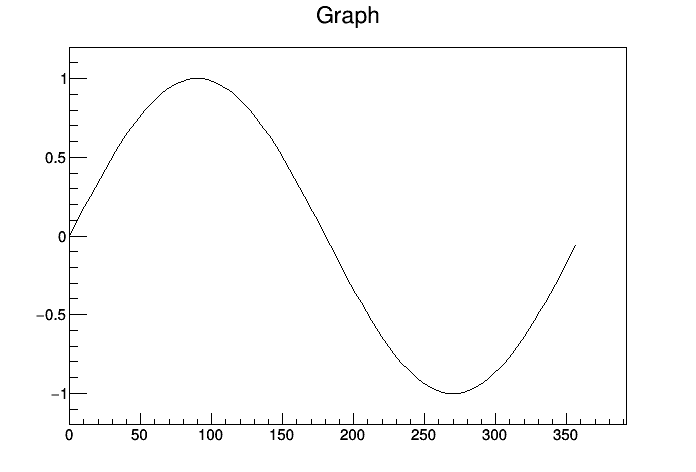

In [7]:
auto can1 = new TCanvas();
gr1->Draw();
can1->Draw();